# Task 0: Calcaute pred, eval, random, shuffled -- use 4 scripts

# Task 0: Combine 30 folds of closeset distance

In [1]:
import numpy as np

In [2]:
closest_dist_fold0 = []
for i in range(30): # <------------------------------------------------------------------------change
	closest_dist_fold0.append(np.load('validation_l7_anti/closest_dist_fold0_' + str(i) + '.npy', allow_pickle=True))
# combine 30 1-d arrays into 1 1-d array
closest_dist_fold0 = np.concatenate(closest_dist_fold0, axis=0)
print('hamming_dist_fold0.shape: ', closest_dist_fold0.shape)

hamming_dist_fold0.shape:  (2315280,)


In [3]:
# save the 1-d array
np.save('validation_l7_anti/closest_dist_fold0.npy', closest_dist_fold0)

# Task 0: Combine 5 fold of predictions

In [2]:
import numpy as np

In [3]:
# load validation data
validation_dict = np.load('validation_l7_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

In [9]:
peptide_pred_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_pred_list.append(np.load('model_evaluation/peptide_pred_fold{}.npy'.format(i), allow_pickle=True))
peptide_pred = np.empty((np.sum([len(peptide_pred_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_pred[i::5] = peptide_pred_list[i]
print("Greedy minibatch prediction number: \n", len(peptide_pred))
print("Greedy minibatch prediction example data: \n", peptide_pred[:10])
correct = 0
for pred, truth in zip(peptide_pred[:, 1], validation_array[:, 1]):
	if pred == truth:
		correct += 1
print("Number of correct prediction: ", correct)
print("Number of total prediction: ", len(peptide_pred))
print("Greedy minibatch prediction accuracy: \n", correct / len(peptide_pred))
with open('model_evaluation/greedy_prediction.txt', 'w') as f:
	f.write("Greedy minibatch prediction number: \n {}\n".format(len(peptide_pred)))
	f.write("Greedy minibatch prediction example data: \n {}\n".format(peptide_pred[:10]))
	f.write("Number of correct prediction: {}\n".format(correct))
	f.write("Number of total prediction: {}\n".format(len(peptide_pred)))
	f.write("Greedy minibatch prediction accuracy: \n {}\n".format(correct / len(peptide_pred)))
# 1.1 save the prediction result
np.save('model_evaluation/peptide_pred.npy', peptide_pred)

peptide_eval_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_list.append(np.load('model_evaluation/peptide_eval_fold{}.npy'.format(i), allow_pickle=True))
peptide_eval = np.empty((np.sum([len(peptide_eval_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval[i::5] = peptide_eval_list[i]
print("minibatch evaluatiion number: \n", len(peptide_eval))
print("minibatch evaluatiion example data: \n", peptide_eval[:10])
y = peptide_eval[:, 2].astype(np.float32)
average_log_prob = np.mean(np.log(y))
median_prob = np.median(y)
print("Minibatch evaluatiion average log probability: \n", average_log_prob)
print("Minibatch evaluatiion median probability: \n", median_prob)
with open('model_evaluation/prob_evaluation.txt', 'w') as f:
	f.write("minibatch evaluatiion number: \n {}\n".format(len(peptide_eval)))
	f.write("minibatch evaluatiion example data: \n {}\n".format(peptide_eval[:10]))
	f.write("Minibatch evaluatiion average log probability: \n {}\n".format(average_log_prob))
	f.write("Minibatch evaluatiion median probability: \n {}\n".format(median_prob))
# 1.1 save the results
np.save('model_evaluation/peptide_eval.npy', peptide_eval)

peptide_eval_shuffled_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_shuffled_list.append(np.load('model_evaluation/peptide_eval_shuffled_fold{}.npy'.format(i), allow_pickle=True))
peptide_eval_shuffled = np.empty((np.sum([len(peptide_eval_shuffled_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_shuffled[i::5] = peptide_eval_shuffled_list[i]
print("minibatch evaluatiion number: \n", len(peptide_eval_shuffled))
print("minibatch evaluatiion example data: \n", peptide_eval_shuffled[:10])
y = peptide_eval_shuffled[:, 2].astype(np.float32)
average_log_prob = np.mean(np.log(y))
median_prob = np.median(y)
print("Minibatch evaluatiion average log probability: \n", average_log_prob)
print("Minibatch evaluatiion median probability: \n", median_prob)
with open('model_evaluation/prob_evaluation_shuffled.txt', 'w') as f:
	f.write("minibatch evaluatiion number: \n {}\n".format(len(peptide_eval_shuffled)))
	f.write("minibatch evaluatiion example data: \n {}\n".format(peptide_eval_shuffled[:10]))
	f.write("Minibatch evaluatiion average log probability: \n {}\n".format(average_log_prob))
	f.write("Minibatch evaluatiion median probability: \n {}\n".format(median_prob))
# 1.1 save the results
np.save('model_evaluation/peptide_eval_shuffled.npy', peptide_eval_shuffled)

peptide_eval_random_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_random_list.append(np.load('model_evaluation/peptide_eval_random_fold{}.npy'.format(i), allow_pickle=True))
peptide_eval_random = np.empty((np.sum([len(peptide_eval_random_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_random[i::5] = peptide_eval_random_list[i]
print("minibatch evaluatiion number: \n", len(peptide_eval_random))
print("minibatch evaluatiion example data: \n", peptide_eval_random[:10])
y = peptide_eval_random[:, 2].astype(np.float32)
average_log_prob = np.mean(np.log(y))
median_prob = np.median(y)
print("Minibatch evaluatiion average log probability: \n", average_log_prob)
print("Minibatch evaluatiion median probability: \n", median_prob)
with open('model_evaluation/prob_evaluation_random.txt', 'w') as f:
	f.write("minibatch evaluatiion number: \n {}\n".format(len(peptide_eval_random)))
	f.write("minibatch evaluatiion example data: \n {}\n".format(peptide_eval_random[:10]))
	f.write("Minibatch evaluatiion average log probability: \n {}\n".format(average_log_prob))
	f.write("Minibatch evaluatiion median probability: \n {}\n".format(median_prob))
# 1.1 save the results
np.save('model_evaluation/peptide_eval_random.npy', peptide_eval_random)

Greedy minibatch prediction number: 
 2315280
Greedy minibatch prediction example data: 
 [['EMIIVKQ' 'PIKIVEI' '0.0010748972417786717']
 ['LRLAQYG' 'AVAVLLP' '0.0014463934348896146']
 ['ACRWRHR' 'VLEVEFE' '2.55056129390141e-05']
 ['TSQSIEA' 'VEFTLTG' '9.506932110525668e-05']
 ['VFRILIV' 'LVYGMAL' '0.001145538641139865']
 ['GCESRWI' 'TYYVELV' '8.063051609497052e-06']
 ['HLIIFQV' 'LIRLIEI' '0.0020959496032446623']
 ['VREMVRV' 'VERVALL' '0.00852983258664608']
 ['IDTVGKL' 'LKVIVGD' '0.0009361190022900701']
 ['IVKFLVG' 'DVEVVRY' '2.4939356080722064e-05']]
Number of correct prediction:  25119
Number of total prediction:  2315280
Greedy minibatch prediction accuracy: 
 0.010849227739193532
minibatch evaluatiion number: 
 2315280
minibatch evaluatiion example data: 
 [['EMIIVKQ' 'IVVQLHA' '3.840530393706132e-10']
 ['LRLAQYG' 'VWSEQIK' '2.583987468440796e-10']
 ['ACRWRHR' 'SFGAEAW' '8.39972535970901e-09']
 ['TSQSIEA' 'ARFKVTQ' '1.5739800574010587e-08']
 ['VFRILIV' 'IAYGMAL' '0.0002623831678647

# Task 0: Load model

In [1]:
from TransformerBeta import *
import torch.nn as nn
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
# 0.1 load the model
model_path = "AF2_transformer_l12h768_validation_anti_l7_1Msteps_22Nov28_1142AM" # <------------------------------------------------------------------------change

query_size, key_size, value_size, num_hiddens = 768, 768, 768, 768
num_layers, dropout = 12, 0.1
lr, training_steps, batch_size, label_smoothing = 0.00005, 1000000, 4096, 0.1
ffn_num_input, ffn_num_hiddens, num_heads = 768, 3072, 8

norm_shape = [768] # 768 corresponds to the dim of such number to normalize
device = d2l.try_gpu()

encoder_standard = TransformerEncoder(
	len(amino_dict), key_size, query_size, value_size, num_hiddens, 
	norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
	num_layers, dropout)
decoder_standard = TransformerDecoder(
	len(amino_dict), key_size, query_size, value_size, num_hiddens, 
	norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
	num_layers, dropout, shared_embedding=encoder_standard.embedding)
model_standard = EncoderDecoder(encoder_standard, decoder_standard)

model_standard_total_params = sum(p.numel() for p in model_standard.parameters())
model_standard_total_trainable_params = sum(p.numel() for p in model_standard.parameters() if p.requires_grad)

state_dict = torch.load(model_path,map_location=('cpu'))
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
	name = k[7:] #remove 'module'
	new_state_dict[name] = v

model_standard.load_state_dict(new_state_dict)

model_use = model_standard # <------------------------------------------------------------------------change
prediction_length = 7 # <------------------------------------------------------------------------change

# 0.2 create a txt file to record the results
if not os.path.exists('model_evaluation'):
	os.mkdir('model_evaluation')
print('Standard model: total number of parameters: {}'.format(model_standard_total_params))
print('Standard model: total number of trainable parameters: {}'.format(model_standard_total_trainable_params))

Standard model: total number of parameters: 198402072
Standard model: total number of trainable parameters: 198402072


# Task 1: embedding analysis

In [4]:
# extratc encoder embedding
encoder_amino_embedding = model_use.encoder.embedding
encoder_amino_embedding_weight = encoder_amino_embedding.weight.data.cpu().numpy()

# extract decoder embedding
decoder_amino_embedding = model_use.decoder.embedding
decoder_amino_embedding_weight = decoder_amino_embedding.weight.data.cpu().numpy()

# extract output layer
output_amino_embedding = model_use.decoder.dense
output_amino_embedding_weight = output_amino_embedding.weight.data.cpu().numpy()

print(encoder_amino_embedding_weight.shape)
print(decoder_amino_embedding_weight.shape)
print(output_amino_embedding_weight.shape)

from sklearn.preprocessing import StandardScaler

# standardize the embedding weights
encoder_amino_embedding_weight_standardized = StandardScaler().fit_transform(encoder_amino_embedding_weight)
decoder_amino_embedding_weight_standardized = StandardScaler().fit_transform(decoder_amino_embedding_weight)

(24, 768)
(24, 768)
(24, 768)


In [5]:
def plot_embeddings(M_reduced, amino_dict, amino_list, amino_property = None, remove_amino=[], text_bias = 0.05):

    from collections import OrderedDict

    for amino in amino_list:
        # if in remove_words, remove the word from the plot
        if amino in remove_amino:
            continue

        if amino_property != None:
            size, (type, color) = amino_property[amino]
            if (type, color) == ('x', 'blue'):
                label = 'aliphatic'
            elif (type, color) == ('s', 'blue'):
                label = 'sulfur'
            elif (type, color) == ('o', 'green'):
                label = 'aromatic'
            elif (type, color) == ('o', 'blue'):
                label = 'hydroxly'
            elif (type, color) == ('o', 'purple'):
                label = 'amide'
            elif (type, color) == ('s', 'red'):
                label = 'positive'
            elif (type, color) == ('x', 'red'):
                label = 'negative'
            elif (type, color) == ('o', 'orange'):
                label = 'unique'
            else:
                raise ValueError('Unknown amino property')
    
            x, y = M_reduced[amino_dict[amino]]
            # create scatter plot contain 2 labels in 2 legends
            plt.scatter(x, y, marker=type, color=color, s=size, label=label)
            plt.text(x+text_bias, y+text_bias, amino, fontsize=12)
            plt.legend()

        else:
            x, y = M_reduced[amino_dict[amino]]
            plt.scatter(x, y, marker='x', color='red', s=60)
            plt.text(x+text_bias, y+text_bias, amino, fontsize=12)

    if amino_property != None:
        # combine same labels
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        additional_labels = ['Small (<120 Da)', 'Medium (120-150 Da)', 'Large (>150 Da)']
        additional_handles = [plt.plot([], [], color="black", marker = 'o', ms=i*5, ls='')[0] for i in range(1, len(additional_labels)+1)]

        plt.legend(list(by_label.values()) + additional_handles, list(by_label.keys())+additional_labels, bbox_to_anchor =(1.275, 1), title='Amino acid property')
    
    # move the legend outside of the plot

amino_letters = list(amino_dict.keys())
amino_letters_removal = ['<bos>', '<eos>', '<pad>', '<unk>']

small_size = 40
medium_size = 120
large_size = 240

aliphatic = ('x', 'blue')
sulfur = ('s', 'blue')
aromatic = ('o', 'green')


hydroxly = ('o', 'blue')
amide = ('o', 'purple')
positive = ('s', 'red')
negative = ('x', 'red')

unique = ('o', 'orange')


amino_property = {
	'A': (small_size, aliphatic),
	'C': (medium_size, sulfur),
	'D': (medium_size, negative),
	'E': (medium_size, negative),
	'F': (large_size, aromatic),
	'G': (small_size, unique),
	'H': (large_size, positive),
	'I': (medium_size, aliphatic),
	'K': (medium_size, positive),
	'L': (medium_size, aliphatic),
	'M': (medium_size, sulfur),
	'N': (medium_size, amide),
	'P': (small_size, unique),
	'Q': (medium_size, amide),
	'R': (large_size, positive),
	'S': (small_size, hydroxly),
	'T': (small_size, hydroxly),
	'V': (small_size, aliphatic),
	'W': (large_size, aromatic),
	'Y': (large_size, aromatic)
}

/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


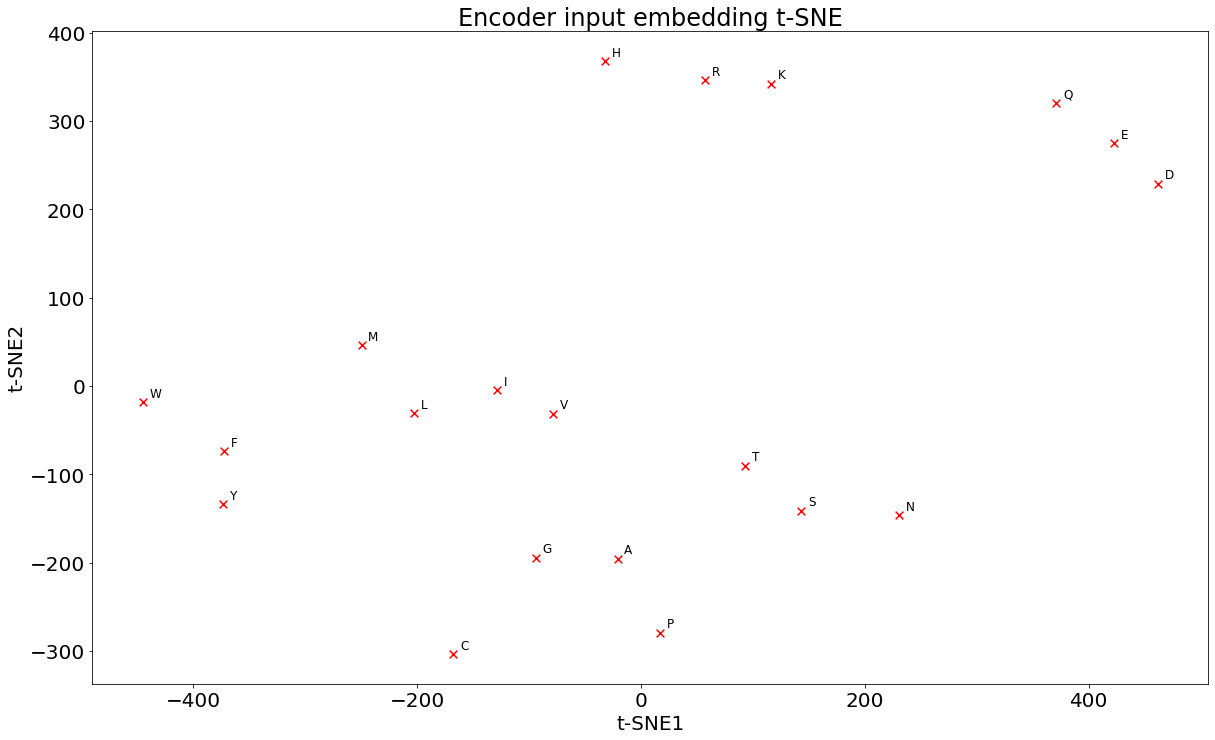

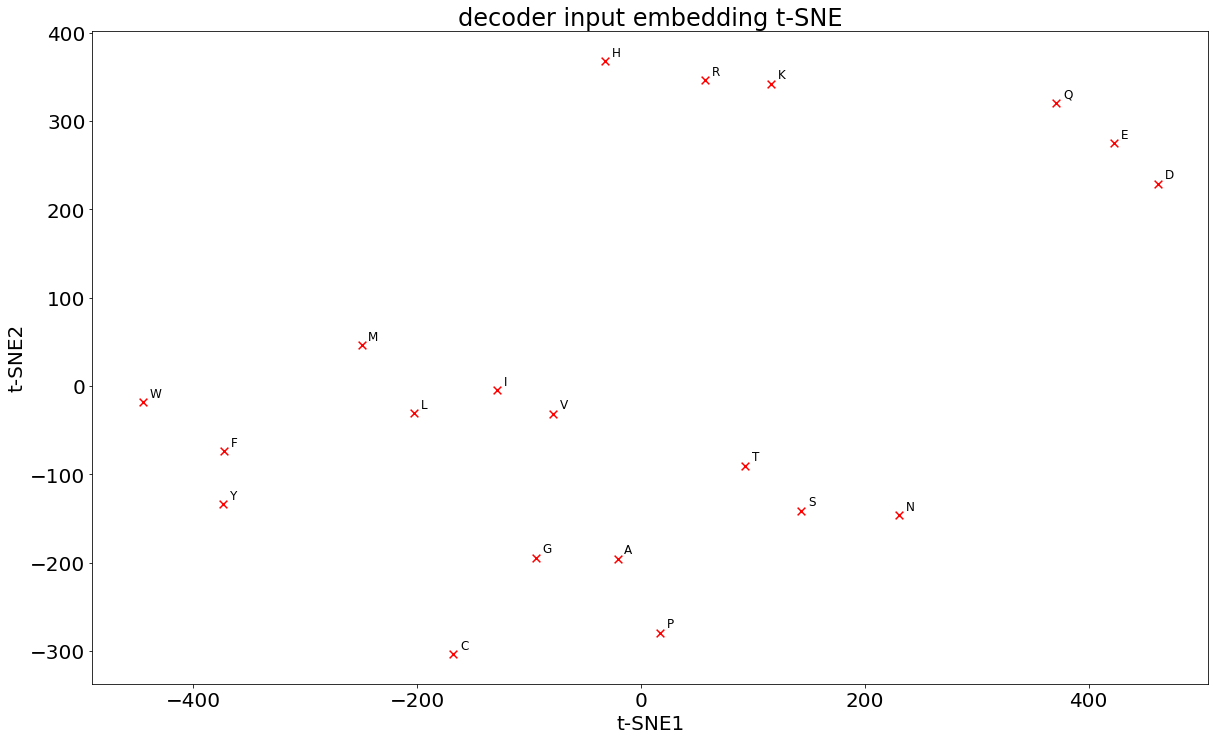

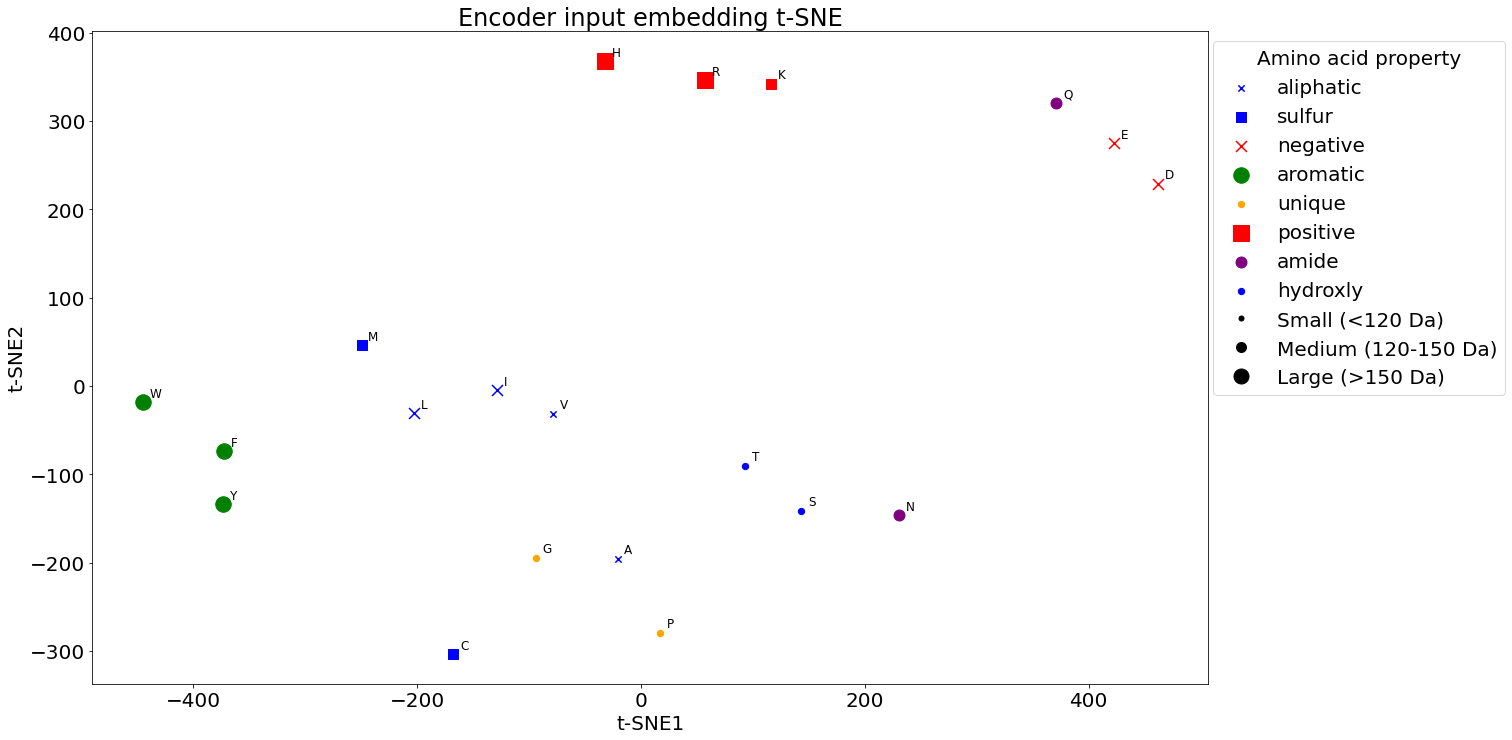

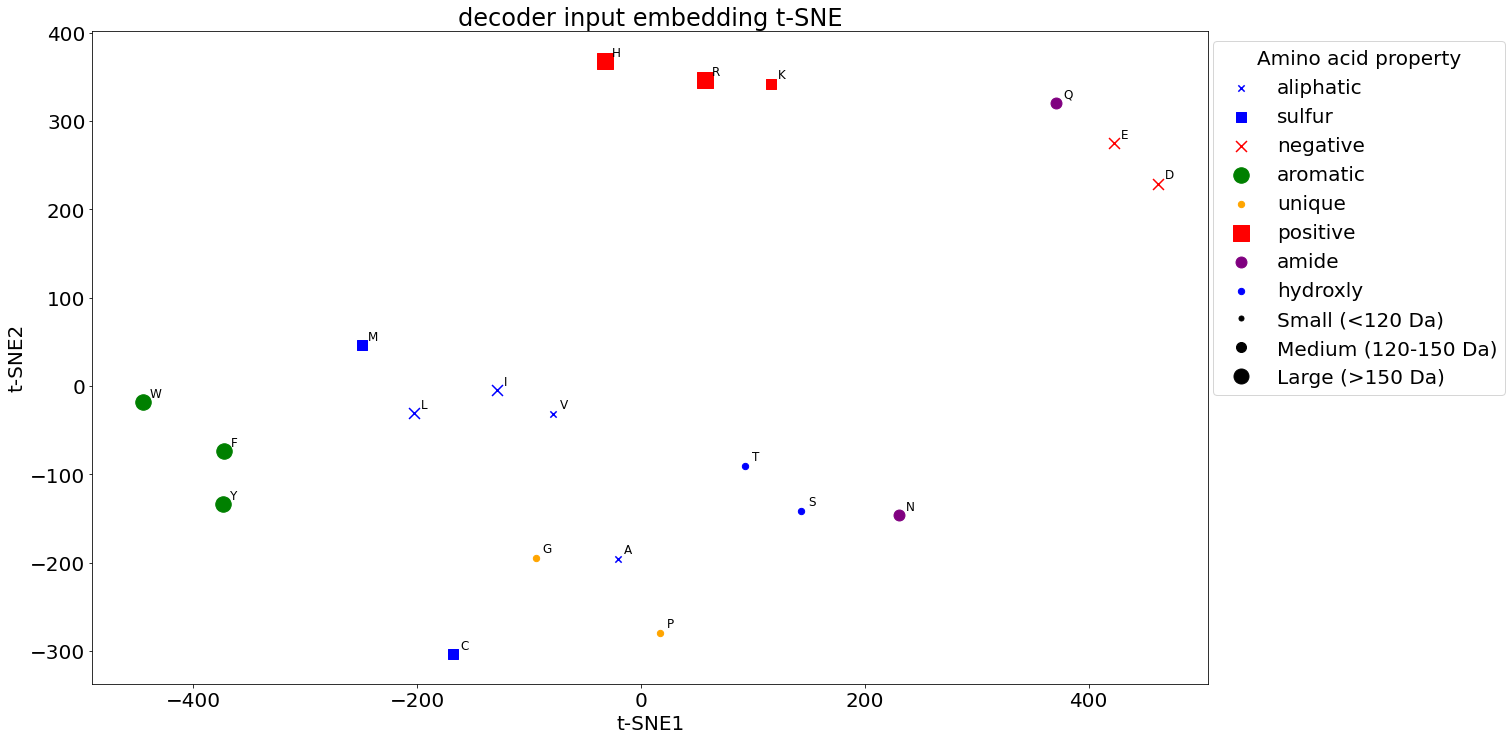

In [6]:
# perform t-SNE on the input embedding weights
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=3, n_iter=1000, random_state=4)
encoder_amino_embedding_weight_tsne = tsne.fit_transform(encoder_amino_embedding_weight_standardized)
decoder_amino_embedding_weight_tsne = tsne.fit_transform(decoder_amino_embedding_weight_standardized)

amino_letters = list(amino_dict.keys())
amino_letters_removal = ['<bos>', '<eos>', '<pad>', '<unk>']

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(encoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("Encoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/encoder_input_embedding_TSNE_no_label.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(decoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/decoder_input_embedding_TSNE_no_label.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(encoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, amino_property=amino_property, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("Encoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/encoder_input_embedding_TSNE.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(decoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, amino_property=amino_property, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/decoder_input_embedding_TSNE.png', bbox_inches='tight')
plt.show()

/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


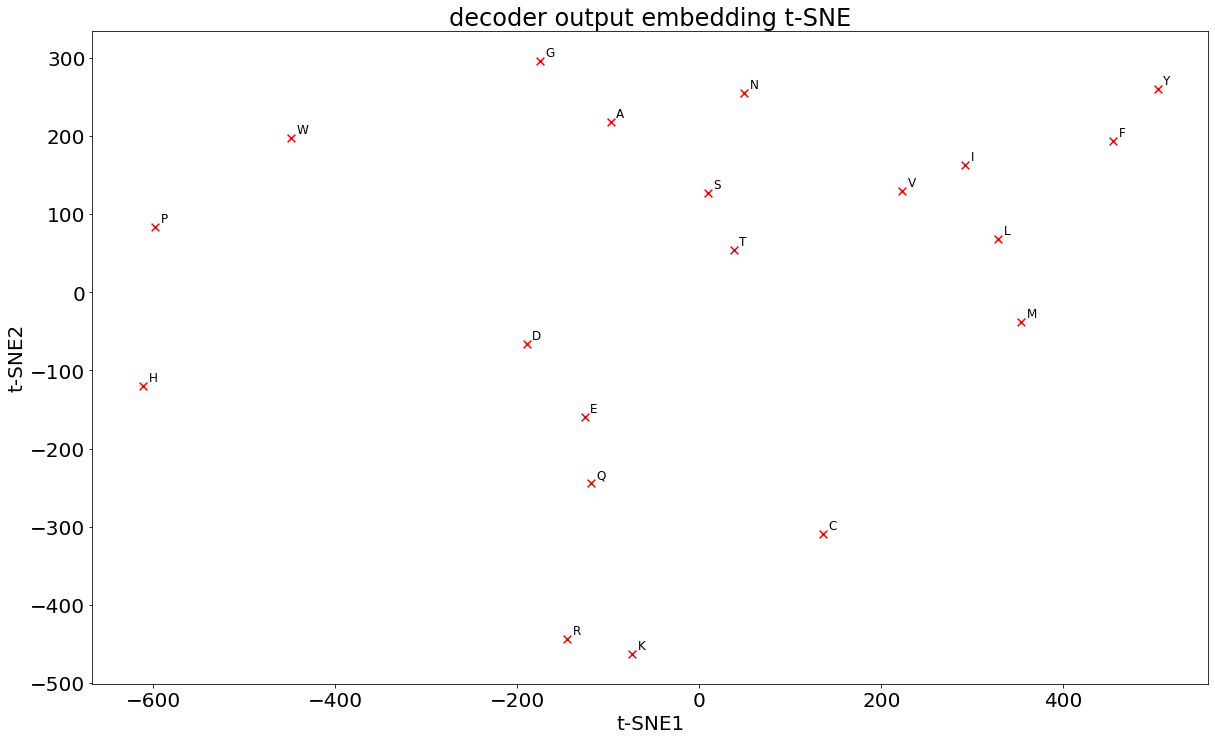

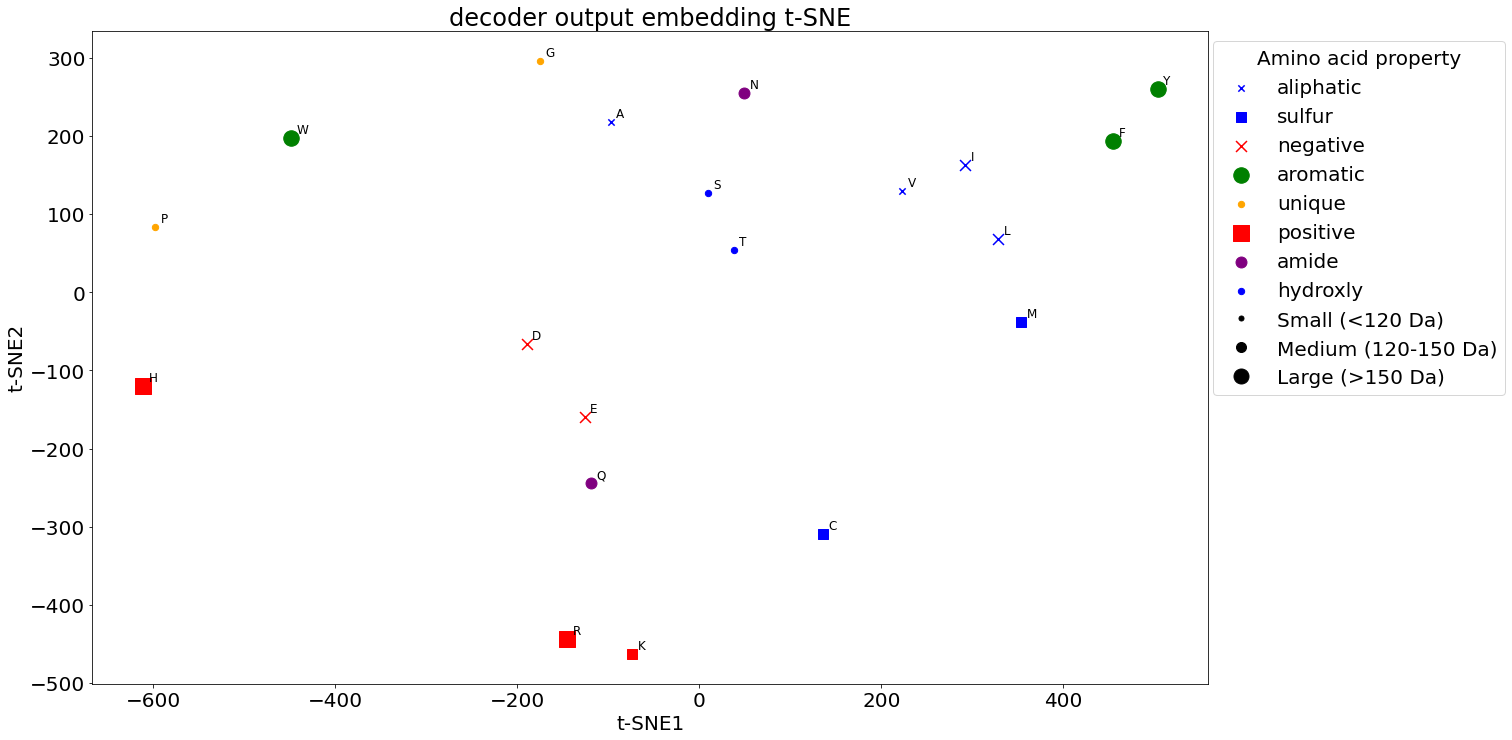

In [7]:
""" plot output embedding """
# perform t-SNE on the output embedding weights

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
output_amino_embedding_weight_tsne = tsne.fit_transform(output_amino_embedding_weight)

amino_letters = list(amino_dict.keys())
amino_letters_removal = ['<bos>', '<eos>', '<pad>', '<unk>']

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(output_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder output embedding t-SNE")
plt.savefig('model_evaluation/decoder_output_embedding_TSNE_no_label.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(output_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, amino_property=amino_property, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder output embedding t-SNE")
plt.savefig('model_evaluation/decoder_output_embedding_TSNE.png', bbox_inches='tight')
plt.show()

# Task 2: Probability vs count scatter plot

In [21]:
from TransformerBeta import *
import torch.nn as nn
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [22]:
# load validation data
validation_dict = np.load('validation_l7_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

In [23]:
# load evaluation data
peptide_eval = np.load('model_evaluation/peptide_eval.npy', allow_pickle=True) # <------------------------------------------------------------------------change
print(validation_array.shape)
print(peptide_eval.shape)

(2315280, 3)
(2315280, 3)


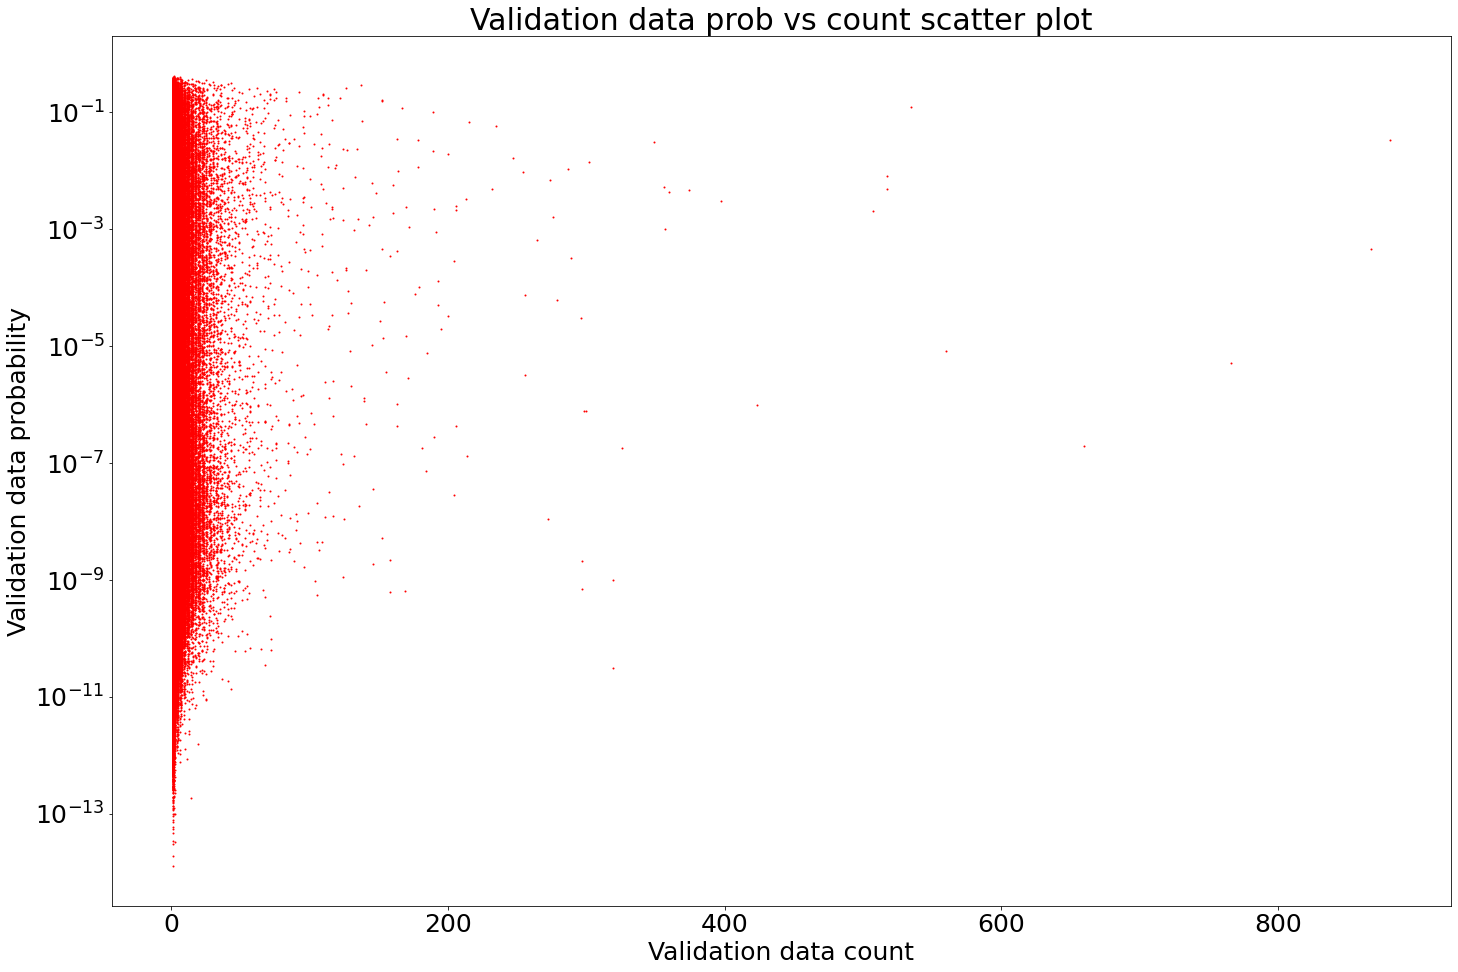

In [24]:
# probability vs count scatter plot
x = validation_array[:, 2].astype(np.float32)
y = peptide_eval[:, 2].astype(np.float32)
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
plt.scatter(x, y, c='r', s=1)
plt.yscale("log")
plt.xlabel('Validation data count')
plt.ylabel('Validation data probability')
plt.title('Validation data prob vs count scatter plot')
plt.savefig('model_evaluation/prob_vs_count_scatter_plot.png')
plt.show()

In [25]:
# calculate correlation coefficient
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.059


# Task 3: Probability distribution analysis

In [15]:
from TransformerBeta import *
import torch.nn as nn
import numpy as np
import os 
import matplotlib.pyplot as plt

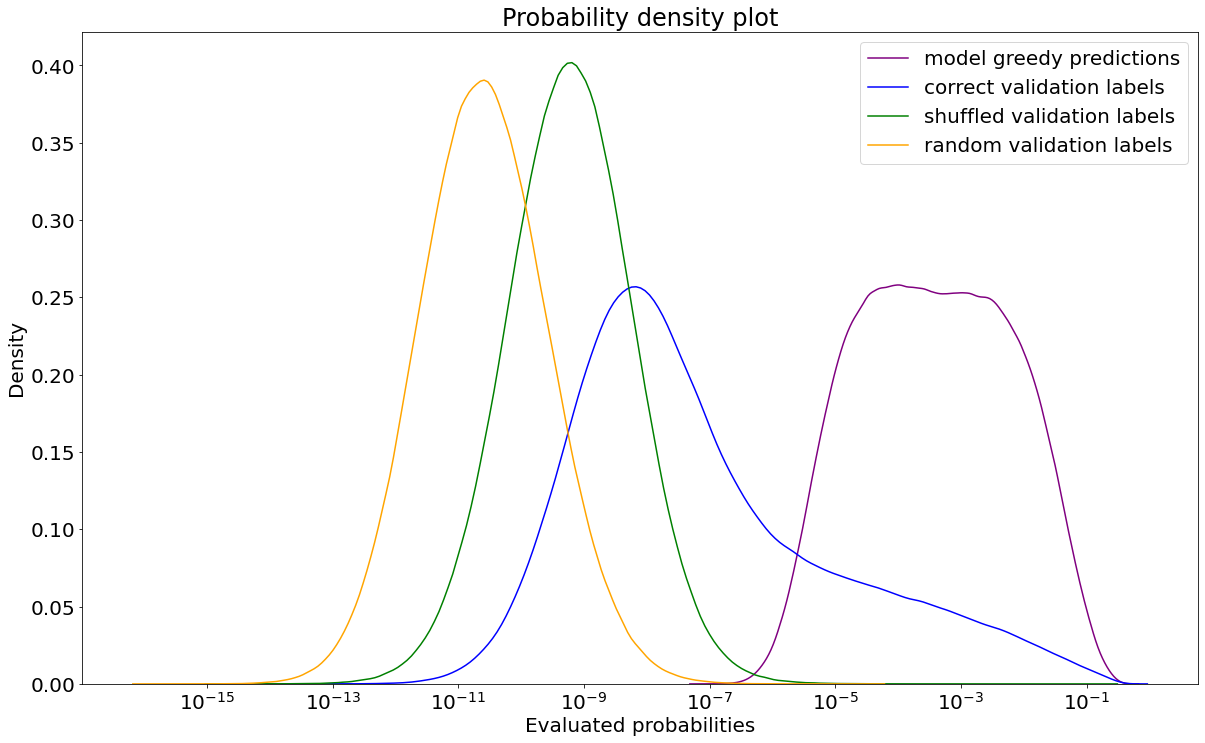

In [16]:
# 0 load the peptide eval and peptide pred
peptide_pred = np.load('model_evaluation/peptide_pred.npy', allow_pickle=True) # <------------------------------------------------------------------------change
peptide_eval = np.load('model_evaluation/peptide_eval.npy', allow_pickle=True) # <------------------------------------------------------------------------change
peptide_eval_shuffled = np.load('model_evaluation/peptide_eval_shuffled.npy', allow_pickle=True) # <------------------------------------------------------------------------change
peptide_eval_random = np.load('model_evaluation/peptide_eval_random.npy', allow_pickle=True) # <------------------------------------------------------------------------change



# 1. probability distribution analysis:
# probability of the model's generation of complementary peptides given the validation target peptides
# probability of the model's evaluation of the validation target peptides and the validation complementary peptides
# probability of the model's evaluation of the validation target peptides and the shuffled validation complementary peptides
# probability of the model's evaluation of the validation target peptides and truly random peptides

# 1.1 probability of the model's generation of complementary peptides given the validation target peptides
peptide_pred_prob= peptide_pred[:, 2].astype(np.float64)

# 1.2 probability of the model's evaluation of the validation target peptides and the validation complementary peptides
peptide_eval_prob = peptide_eval[:, 2].astype(np.float64)

# 1.3 probability of the model's evaluation of the validation target peptides and the shuffled validation complementary peptides
peptide_eval_shuffled_prob = peptide_eval_shuffled[:, 2].astype(np.float64)

# 1.4 probability of the model's evaluation of the validation target peptides and truly random peptides
peptide_eval_random_prob = peptide_eval_random[:, 2].astype(np.float64)

# 1.5 plot the probability distribution
import seaborn as sns

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
k0 = sns.kdeplot(peptide_pred_prob, log_scale=10, label= "model greedy predictions", c='purple')
k1 = sns.kdeplot(peptide_eval_prob, log_scale=10, label= "correct validation labels", c='blue')
k2 = sns.kdeplot(peptide_eval_shuffled_prob, log_scale=10, label= "shuffled validation labels", c='green')
k3 = sns.kdeplot(peptide_eval_random_prob, log_scale=10, label= "random validation labels", c = 'orange')

plt.xlabel('Evaluated probabilities')
plt.legend()
plt.title('Probability density plot')
plt.savefig('model_evaluation/evaluated_density_plot.png')
plt.show()

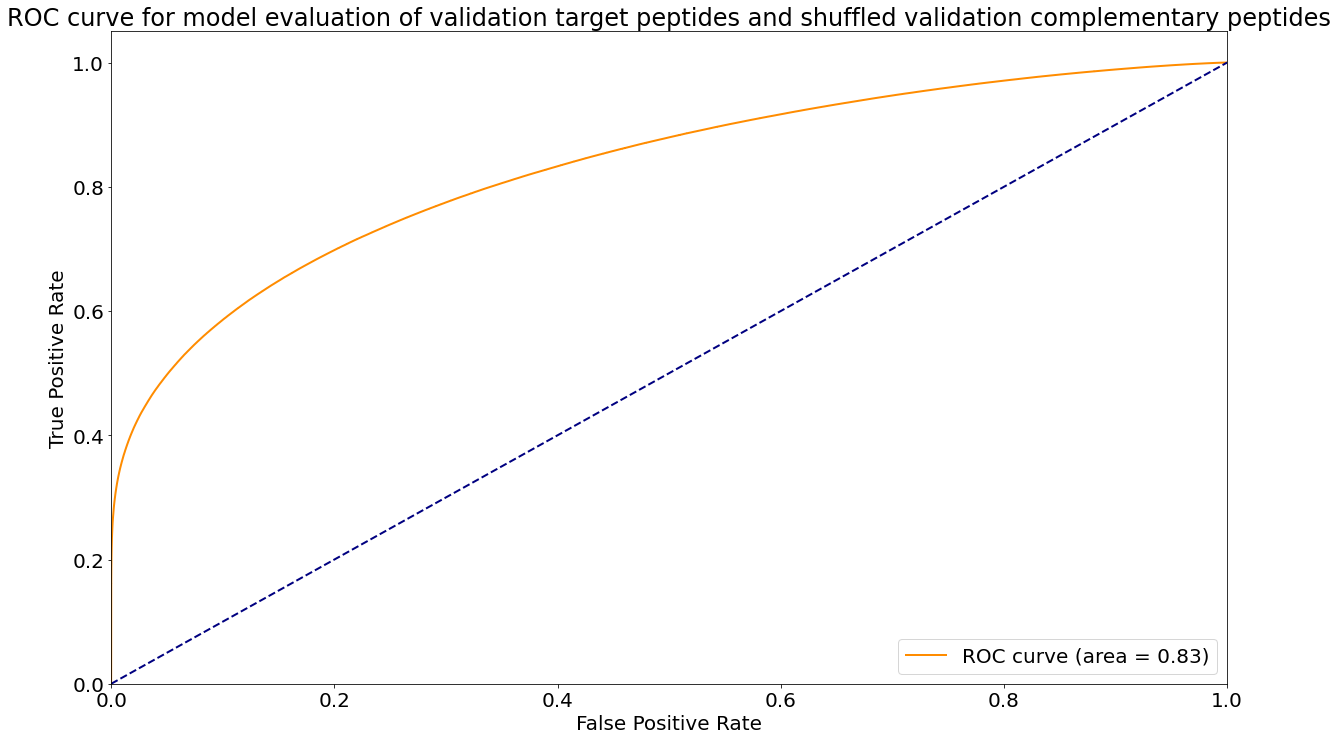

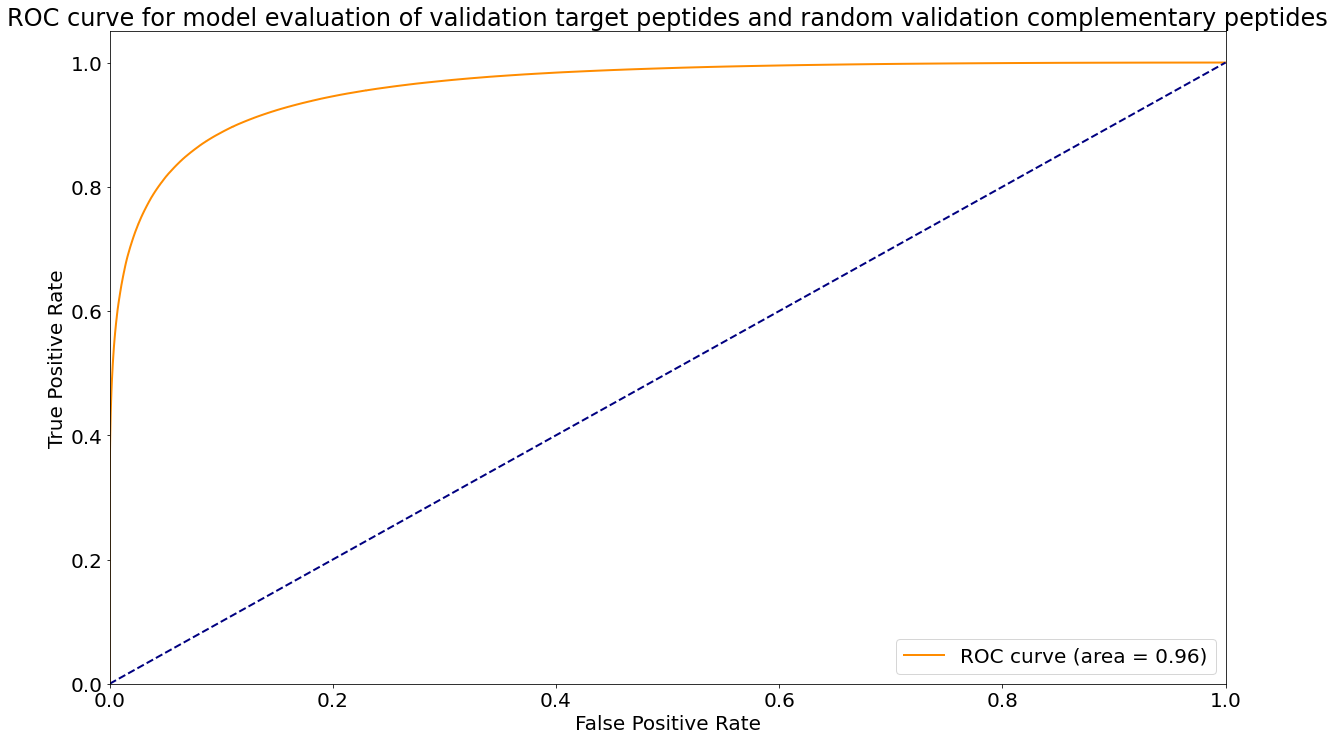

AUC for model evaluation of validation target peptides and shuffled validation complementary peptides:  0.8292963269113462
AUC for model evaluation of validation target peptides and random validation complementary peptides:  0.9616109572870469


In [18]:
# 2. 
# task1: calculate ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the shuffled validation complementary peptides
# task2: calculate ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the truly random peptides

from sklearn.metrics import roc_curve, auc

# 2.1 ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the shuffled validation complementary peptides
y_true = np.concatenate((np.ones(peptide_eval_prob.shape[0]), np.zeros(peptide_eval_shuffled_prob.shape[0])))
y_score = np.concatenate((peptide_eval_prob, peptide_eval_shuffled_prob))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc_shuffled = auc(fpr, tpr)

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_shuffled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for model evaluation of validation target peptides and shuffled validation complementary peptides')
plt.legend(loc="lower right")
plt.savefig('model_evaluation/ROC_curve_shuffled.png')
plt.show()

# 2.2 ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the truly random peptides
y_true = np.concatenate((np.ones(peptide_eval_prob.shape[0]), np.zeros(peptide_eval_random_prob.shape[0])))
y_score = np.concatenate((peptide_eval_prob, peptide_eval_random_prob))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc_random = auc(fpr, tpr)

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for model evaluation of validation target peptides and random validation complementary peptides')
plt.legend(loc="lower right")
plt.savefig('model_evaluation/ROC_curve_random.png')
plt.show()

# print the AUC
print('AUC for model evaluation of validation target peptides and shuffled validation complementary peptides: ', roc_auc_shuffled)
print('AUC for model evaluation of validation target peptides and random validation complementary peptides: ', roc_auc_random)


# Task 4: Attention analysis

In [57]:
# load validation data
validation_dict = np.load('validation_l7_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

In [75]:
# extract a subset of validation data
# print out some samples
num_seq = 1000
count_max = 10000
count_min = 50

validation_top_count = []
for data in validation_array:
    if int(data[2]) <= count_max and int(data[2]) >= count_min:
        validation_top_count.append(data)
    if len(validation_top_count) > num_seq:
        break
validation_top_count = np.array(validation_top_count[:num_seq])   
print(len(validation_top_count))
print(validation_top_count[:40])

680
[['VGLHRWK' 'LTVLYTK' '59']
 ['LDEVQPV' 'SLRAVAE' '99']
 ['CIDDITI' 'CIWLGVL' '85']
 ['LVNCVAR' 'SEAFLLY' '114']
 ['GLISYTT' 'KLVEMRE' '71']
 ['IEVRSNT' 'DTFTAVI' '81']
 ['LHASYTY' 'ELLWPYS' '71']
 ['KCSWKFY' 'EAGVDQG' '68']
 ['VGWTATD' 'YVLTFTA' '50']
 ['LITMGNY' 'IERVVRG' '108']
 ['GGATYAD' 'NSVYIWG' '96']
 ['KEEKIIN' 'EVVIKIG' '57']
 ['YTIEFRR' 'GRVRLVY' '132']
 ['HAGISHT' 'NIYGFIG' '77']
 ['EVKQLDK' 'IVEFSQG' '206']
 ['VSQKALP' 'MITVGAE' '52']
 ['RTFHIDL' 'ATFNLSQ' '55']
 ['MQEMDHI' 'PRLLSVA' '78']
 ['FFYKGDP' 'NRVFGYM' '53']
 ['FIQLQVD' 'EATVWLA' '55']
 ['NYRLQGK' 'DEGGIFY' '65']
 ['LKSLLLR' 'EYELMIG' '103']
 ['VMSVTLI' 'AGFSAFV' '75']
 ['GILHFTY' 'ASSEVKI' '53']
 ['PFEFWNK' 'PASCRYD' '71']
 ['MTVVGFG' 'GAINIGS' '94']
 ['GTLSFEH' 'FTLVCRL' '123']
 ['VVQTTRE' 'METYKLL' '60']
 ['WWGGYVG' 'MLEYWFF' '50']
 ['QGSVDFQ' 'TVTYTIV' '102']
 ['LRLEAIS' 'LTVQWQI' '56']
 ['AQMVELT' 'CAHLRFS' '55']
 ['MRVVANP' 'NEFFWTV' '79']
 ['IEILKAF' 'EGLLIGY' '51']
 ['TKIVGIN' 'VDIGIVI' '68']
 ['EGEITC

#### Target of selection

In [158]:
task_target = 'PFEFWNK'
model_use = model_standard
prediction_length = 7

#### Greedy single prediction

In [159]:
dec_comple_peptide_pred, dec_prob, dec_attention_weight_seq = predict_greedy_single(model_use, task_target, amino_dict, prediction_length + 2, device, save_attention_weights=True, print_info=True)

Conditional probability at position 1 is 0.10146427154541016
Conditional probability at position 2 is 0.23807016015052795
Conditional probability at position 3 is 0.25763362646102905
Conditional probability at position 4 is 0.25120770931243896
Conditional probability at position 5 is 0.175323024392128
Conditional probability at position 6 is 0.3106577396392822
Conditional probability at position 7 is 0.13246852159500122
Conditional probability at position 8 is 0.9143574833869934
Input target sequence is PFEFWNK, predicted complementary peptide is VLRVRLS
Condition on input, predicted probability is 1.031343796629397e-05


#### Candidates sampling

In [160]:
num_candidates = 100
max_iter = 20

peptide_candidates = sample_candidates(model_use, task_target, num_candidates, amino_dict, prediction_length + 2, device, max_iter=max_iter)
print(peptide_candidates)

number of total candidates sampled: 200
number of unique top candidates successfully sampled: 100
[['LLKLHVS' '4.872072167927399e-06']
 ['IRWTLRW' '5.65588663903327e-07']
 ['TFKVWEG' '4.746610215988767e-07']
 ['VLRLILQ' '4.481265989397798e-07']
 ['TFKAHIS' '3.03259128031641e-07']
 ['FRWQINF' '2.6408443432046624e-07']
 ['VLKLTIT' '2.568756656273763e-07']
 ['RFRVHLL' '2.444754443331476e-07']
 ['VLRVELI' '2.3982121888366237e-07']
 ['VLRVRNC' '2.0073741779924603e-07']
 ['VISVKDV' '1.739478534545924e-07']
 ['TRQEKTF' '1.739013981705284e-07']
 ['SLKVTLT' '1.736840573585141e-07']
 ['VLRVRGF' '1.7291371534611244e-07']
 ['VIIGGIE' '1.6439065575468703e-07']
 ['KLKILLH' '1.5545217024737212e-07']
 ['VIRVRAV' '1.458475225035727e-07']
 ['SFTVGIS' '1.3365536233322928e-07']
 ['KGLIIVN' '1.3129526621469267e-07']
 ['SEKKLNY' '1.2233873292188946e-07']
 ['MLKVPEY' '1.175301989064792e-07']
 ['SFKSYIG' '9.685037127837859e-08']
 ['FKWSAGH' '9.522411659190766e-08']
 ['VFSVRQL' '8.01532422656237e-08']
 ['IIFKK

#### Peptides pair evaluation

In [161]:
task_target = task_target
dec_comple_peptide_pred = 'PASCRYD'

dec_prob, dec_attention_weight_seq = evaluate_single(model_use, task_target, dec_comple_peptide_pred,amino_dict, prediction_length + 2, device, save_attention_weights=True, print_info=True)

Conditional probability at position 1 is 0.013299800455570221
Conditional probability at position 2 is 0.03920464962720871
Conditional probability at position 3 is 0.08884551376104355
Conditional probability at position 4 is 0.013902072794735432
Conditional probability at position 5 is 0.10020529478788376
Conditional probability at position 6 is 0.053508736193180084
Conditional probability at position 7 is 0.03461220860481262
Conditional probability at position 8 is 0.9143736958503723
Input target sequence is PFEFWNK, complementary peptide is PASCRYD
Evaluated probability is 1.092864109070459e-10


#### Visualize attention

In [29]:
# attention weights preprocessing

encoder_self_attention_raw = [torch.unsqueeze(attention, dim=0) for attention in model_use.encoder.attention_weights]
decoder_self_attention_raw = [torch.unsqueeze(attention, dim=0) for attention in dec_attention_weight_seq[-1][0]]
decoder_encoder_attention_raw = [torch.unsqueeze(attention, dim=0) for attention in dec_attention_weight_seq[-1][1]]

encoder_self_attention = [torch.tensor(np.delete(np.delete(layer_attention.detach().numpy(), [-2, -1], 3), [-2, -1], 2)) for layer_attention in encoder_self_attention_raw]
decoder_self_attention = [torch.tensor(np.delete(np.delete(layer_attention.detach().numpy(), -1, 3), -1, 2)) for layer_attention in decoder_self_attention_raw]
decoder_encoder_attention = [torch.tensor(np.delete(np.delete(layer_attention.detach().numpy(), [-2, -1], 3), -1, 2)) for layer_attention in decoder_encoder_attention_raw]
print(encoder_self_attention[0].shape)
print(decoder_self_attention[0].shape)
print(decoder_encoder_attention[0].shape)

# encoder_text = d2l.truncate_pad(list(task_target) + ['<eos>'], prediction_length+2, '<pad>')
# decoder_text = ['<bos>'] + list(dec_comple_peptide_pred)

encoder_text = list(task_target)
decoder_text = list(dec_comple_peptide_pred)

print(encoder_text)
print(decoder_text)

torch.Size([1, 8, 7, 7])
torch.Size([1, 8, 7, 7])
torch.Size([1, 8, 7, 7])
['G', 'H', 'Y', 'V', 'V', 'Y', 'L']
['G', 'S', 'H', 'V', 'L', 'V', 'A']


In [30]:
# attention model view

from bertviz import model_view

model_view(
	encoder_attention=encoder_self_attention, 
	decoder_attention=decoder_self_attention,
	cross_attention=decoder_encoder_attention, 
	encoder_tokens=encoder_text,
	decoder_tokens=decoder_text, 
	display_mode="light"
)

<IPython.core.display.Javascript object>

In [23]:
# attention head_view

from bertviz import head_view
head_view(
	encoder_attention=encoder_self_attention, 
	decoder_attention=decoder_self_attention,
	cross_attention=decoder_encoder_attention, 
	encoder_tokens=encoder_text,
	decoder_tokens=decoder_text, 
)

<IPython.core.display.Javascript object>

# Task 5: Validation acc + log prob vs Dist plot

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# load validation data
validation_dict = np.load('validation_l7_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

# load peptide_pred
peptide_pred = np.load('model_evaluation/peptide_pred.npy', allow_pickle=True)

# load peptide_eval
peptide_eval = np.load('model_evaluation/peptide_eval.npy', allow_pickle=True)

# load closest_dist
closest_dist = np.load('validation_l7_anti/closest_dist_fold0.npy', allow_pickle=True)

# print info
print(validation_array.shape)
print(peptide_pred.shape)
print(peptide_eval.shape)
print(closest_dist.shape)

(2315280, 3)
(2315280, 3)
(2315280, 3)
(2315280,)


Number of sequences with closet dist 1:  414213
Number of sequences with closet dist 2:  372809
Number of sequences with closet dist 3:  356210
Number of sequences with closet dist 4:  411265
Number of sequences with closet dist 5:  566143
Number of sequences with closet dist 6:  190853
Number of sequences with closet dist 7:  3787


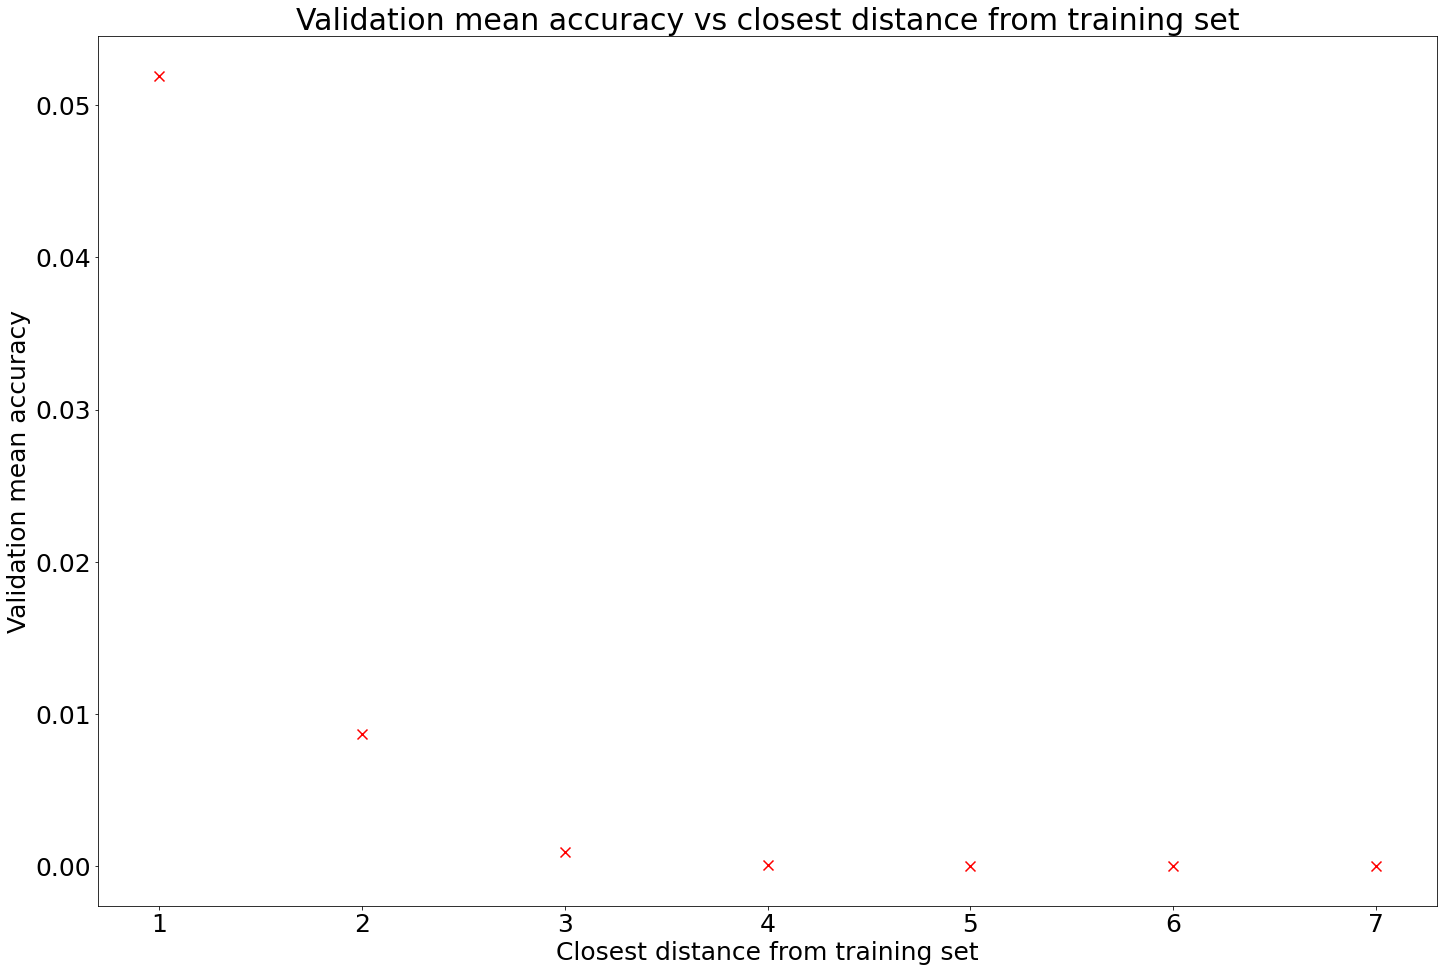

In [41]:
# plot mean accuracy vs dist graph 
min_dist = np.min(closest_dist)
max_dist = np.max(closest_dist)

acc_list = [[] for i in range(min_dist, max_dist + 1)]
for dist, prediction, truth in zip(closest_dist, peptide_pred[:, 1], validation_array[:, 1]):
	if prediction == truth:
		acc_list[dist - min_dist].append(1)
	else:
		acc_list[dist - min_dist].append(0)

mean_acc_list = []
for i, acc in enumerate(acc_list):
    mean_acc_list.append(np.mean(acc))
    print("Number of sequences with closet dist {}: ".format(range(min_dist, max_dist + 1)[i]), len(acc))
    
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
plt.scatter(range(min_dist, max_dist + 1), mean_acc_list, c='r', s=100, marker = "x")
plt.xlabel('Closest distance from training set')
plt.ylabel('Validation mean accuracy')
plt.title('Validation mean accuracy vs closest distance from training set')
plt.savefig('model_evaluation/mean_acc_vs_dist_scatter_plot.png')
plt.show()

Number of sequences with closet dist 1:  414213
Number of sequences with closet dist 2:  372809
Number of sequences with closet dist 3:  356210
Number of sequences with closet dist 4:  411265
Number of sequences with closet dist 5:  566143
Number of sequences with closet dist 6:  190853
Number of sequences with closet dist 7:  3787


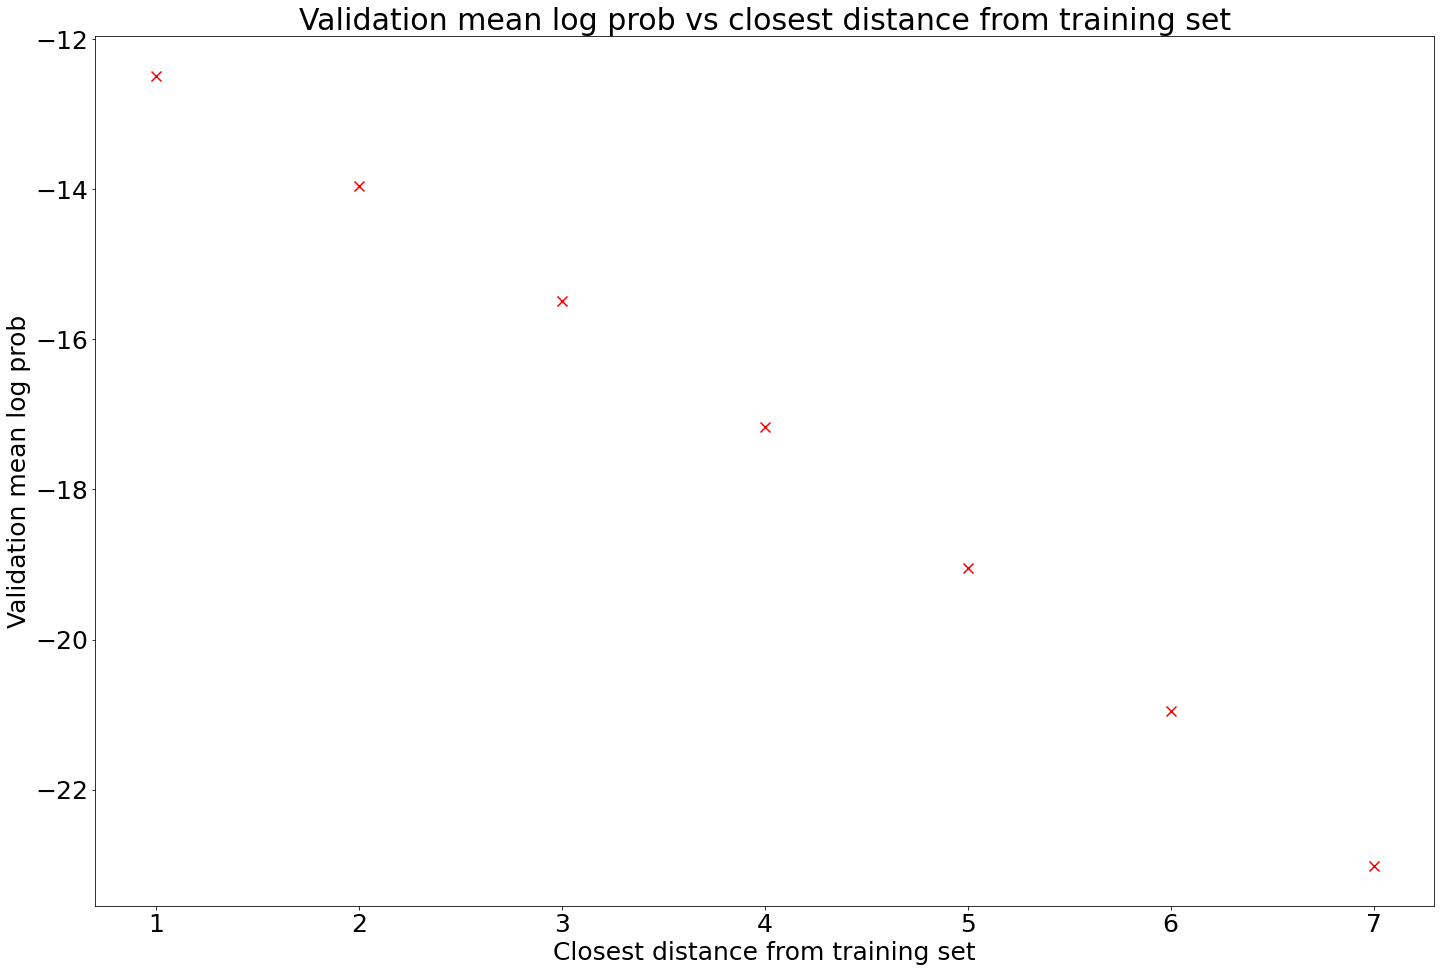

In [42]:
# plot mean log prob vs dist graph 
min_dist = np.min(closest_dist)
max_dist = np.max(closest_dist)

prob_list = [[] for i in range(min_dist, max_dist + 1)]
peptide_eval_prob = peptide_eval[:, 2].astype(np.float64)
for dist, prob in zip(closest_dist, peptide_eval_prob):
	prob_list[dist - min_dist].append(prob)

mean_prob_list = [np.mean(np.log(prob)) for prob in prob_list]
for i, prob in enumerate(prob_list):
	print("Number of sequences with closet dist {}: ".format(range(min_dist, max_dist + 1)[i]), len(prob))

plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
plt.scatter(range(min_dist, max_dist + 1), mean_prob_list, c='r', s=100, marker = "x")
plt.xlabel('Closest distance from training set')
plt.ylabel('Validation mean log prob')
plt.title('Validation mean log prob vs closest distance from training set')
plt.savefig('model_evaluation/mean_log_prob_vs_dist_scatter_plot.png')
plt.show()

# Task 6: Frequency check - use script "model_evaluate_frequency_check"

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load validation data
validation_dict = np.load('validation_l7_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

# load training data
train_dict = np.load('train_l7_anti/train_dict_fold0.npy', allow_pickle=True)
train_dict = train_dict.tolist()
train_list = []
for target, value_dict in train_dict.items():
    for comp, count in value_dict.items():
        train_list.append([target, comp, count])
train_array = np.array(train_list)

# load peptide_pred
peptide_pred = np.load('model_evaluation/peptide_pred.npy', allow_pickle=True)

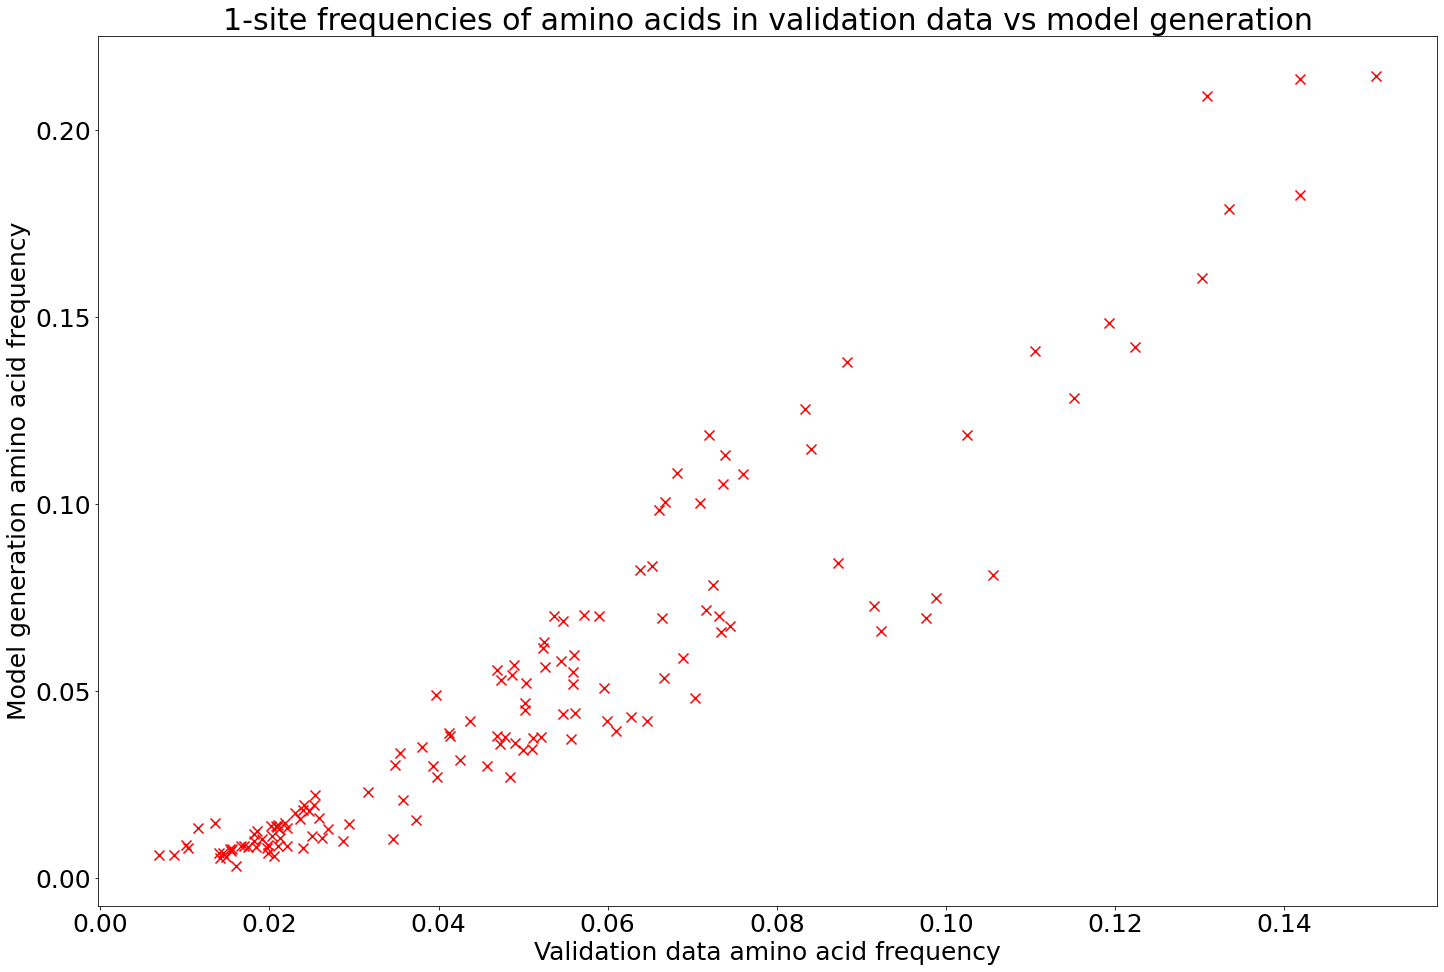

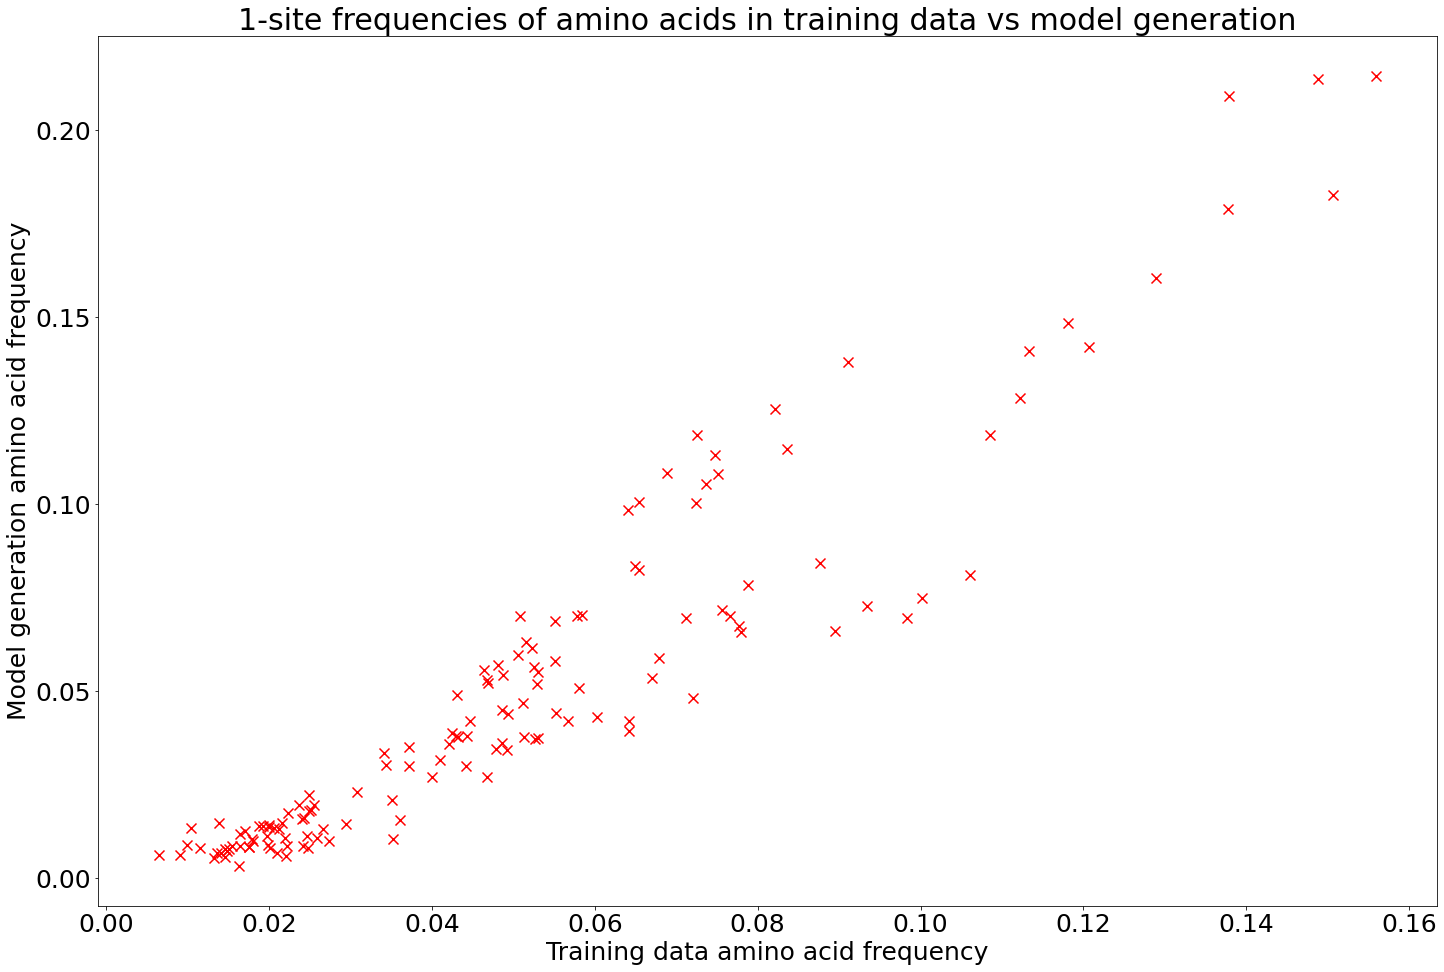

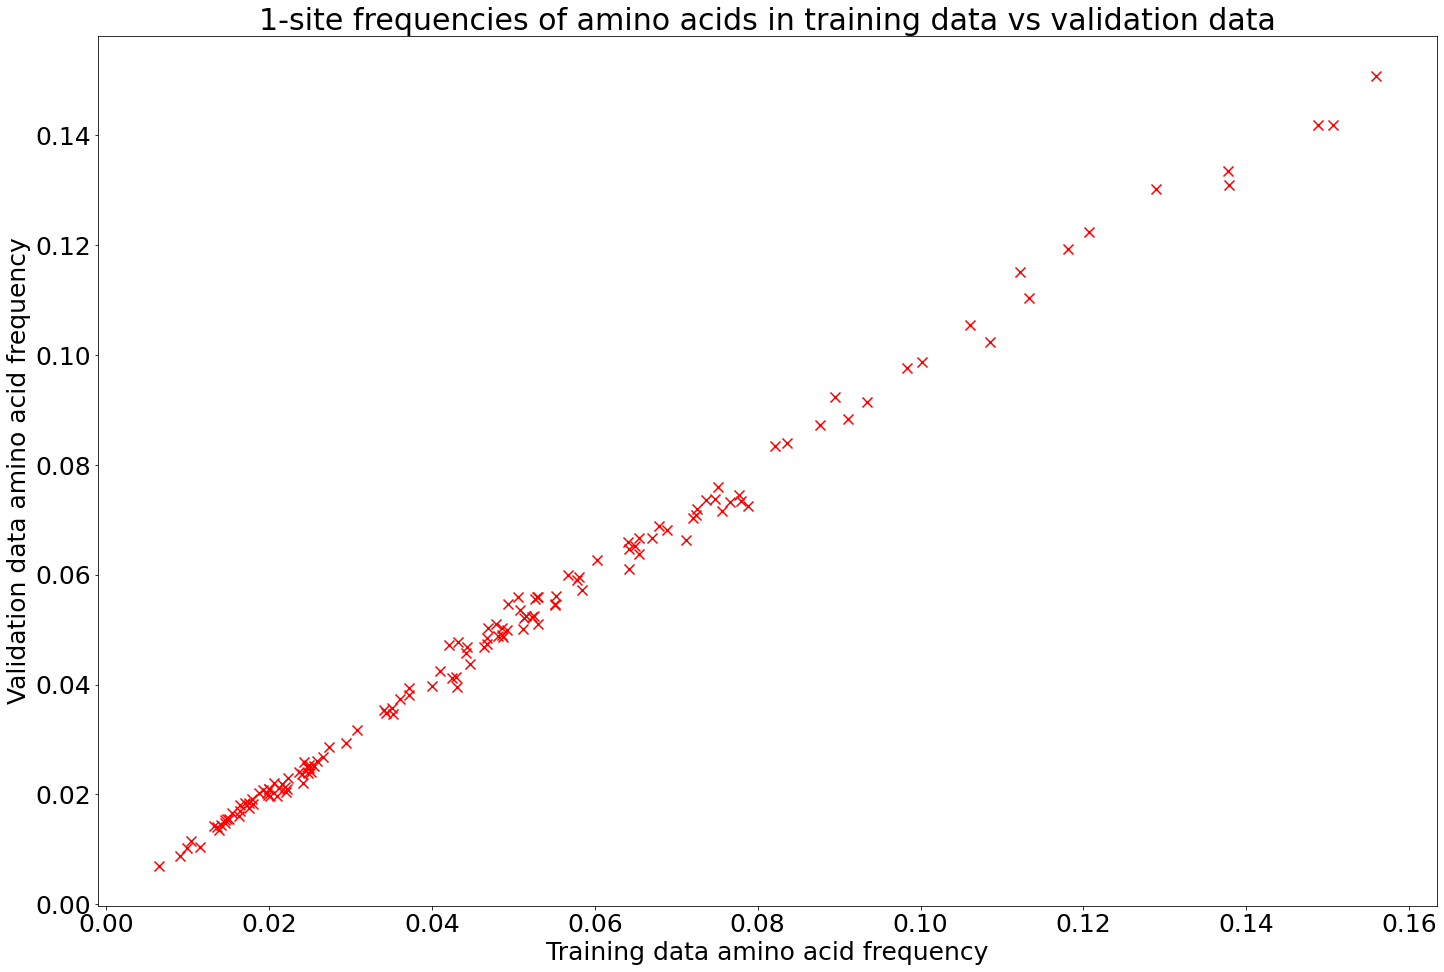

In [5]:
amino_dict_freq = {'A': 0,
'C': 1,
'D': 2,
'E': 3,
'F': 4,
'G': 5,
'H': 6,
'I': 7,
'K': 8,
'L': 9,
'M': 10,
'N': 11,
'P': 12,
'Q': 13,
'R': 14,
'S': 15,
'T': 16,
'V': 17,
'W': 18,
'Y': 19}

# 1. calculate amino acid frequency in each position for validation data

# create a 2 by 2 array to store number of amino acids in each position
amino_count = np.zeros((len(validation_array[0][1]), len(amino_dict_freq)))

# count amino acids in each position
for i in range(len(validation_array)):
	for j in range(len(validation_array[i][1])):
		amino_count[j][amino_dict_freq[validation_array[i][1][j]]] += 1
        
# calculate amino acid frequency in each position
amino_freq = amino_count / np.sum(amino_count, axis=1)[:, None]

# 2. calculate amino acid frequency in each position for training data

# create a 2 by 2 array to store number of amino acids in each position
amino_count_train = np.zeros((len(train_array[0][1]), len(amino_dict_freq)))

# count amino acids in each position
for i in range(len(train_array)):
	for j in range(len(train_array[i][1])):
		amino_count_train[j][amino_dict_freq[train_array[i][1][j]]] += 1

# calculate amino acid frequency in each position
amino_freq_train = amino_count_train / np.sum(amino_count_train, axis=1)[:, None]

# 3. calculate amino acid frequency in each position for prediction

# create a 2 by 2 array to store number of amino acids in each position
amino_count_pred = np.zeros((len(validation_array[0][1]), len(amino_dict_freq)))

# count amino acids in each position
for i in range(len(peptide_pred)):
	for j in range(len(peptide_pred[i][1])):
		amino_count_pred[j][amino_dict_freq[peptide_pred[i][1][j]]] += 1

# calculate amino acid frequency in each position
amino_freq_pred = amino_count_pred / np.sum(amino_count_pred, axis=1)[:, None]

# 4. scatter plot the validation data frequency vs model generation frequency on a single plot
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
for i in range(len(amino_freq)):
	plt.scatter(amino_freq[i], amino_freq_pred[i], c='r', s=100, marker = "x")
plt.xlabel('Validation data amino acid frequency')
plt.ylabel('Model generation amino acid frequency')
plt.title('1-site frequencies of amino acids in validation data vs model generation')
plt.savefig('model_evaluation/1_site_freq_validation_vs_model_generation.png')
plt.show()

# 5. scatter plot the training data frequency vs model generation frequency on a single plot
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
for i in range(len(amino_freq_train)):
	plt.scatter(amino_freq_train[i], amino_freq_pred[i], c='r', s=100, marker = "x")
plt.xlabel('Training data amino acid frequency')
plt.ylabel('Model generation amino acid frequency')
plt.title('1-site frequencies of amino acids in training data vs model generation')
plt.savefig('model_evaluation/1_site_freq_training_vs_model_generation.png')
plt.show()

# 6. scatter plot the training data frequency vs validation data frequency on a single plot
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
for i in range(len(amino_freq_train)):
	plt.scatter(amino_freq_train[i], amino_freq[i], c='r', s=100, marker = "x")
plt.xlabel('Training data amino acid frequency')
plt.ylabel('Validation data amino acid frequency')
plt.title('1-site frequencies of amino acids in training data vs validation data')
plt.savefig('model_evaluation/1_site_freq_training_vs_validation.png')
plt.show()

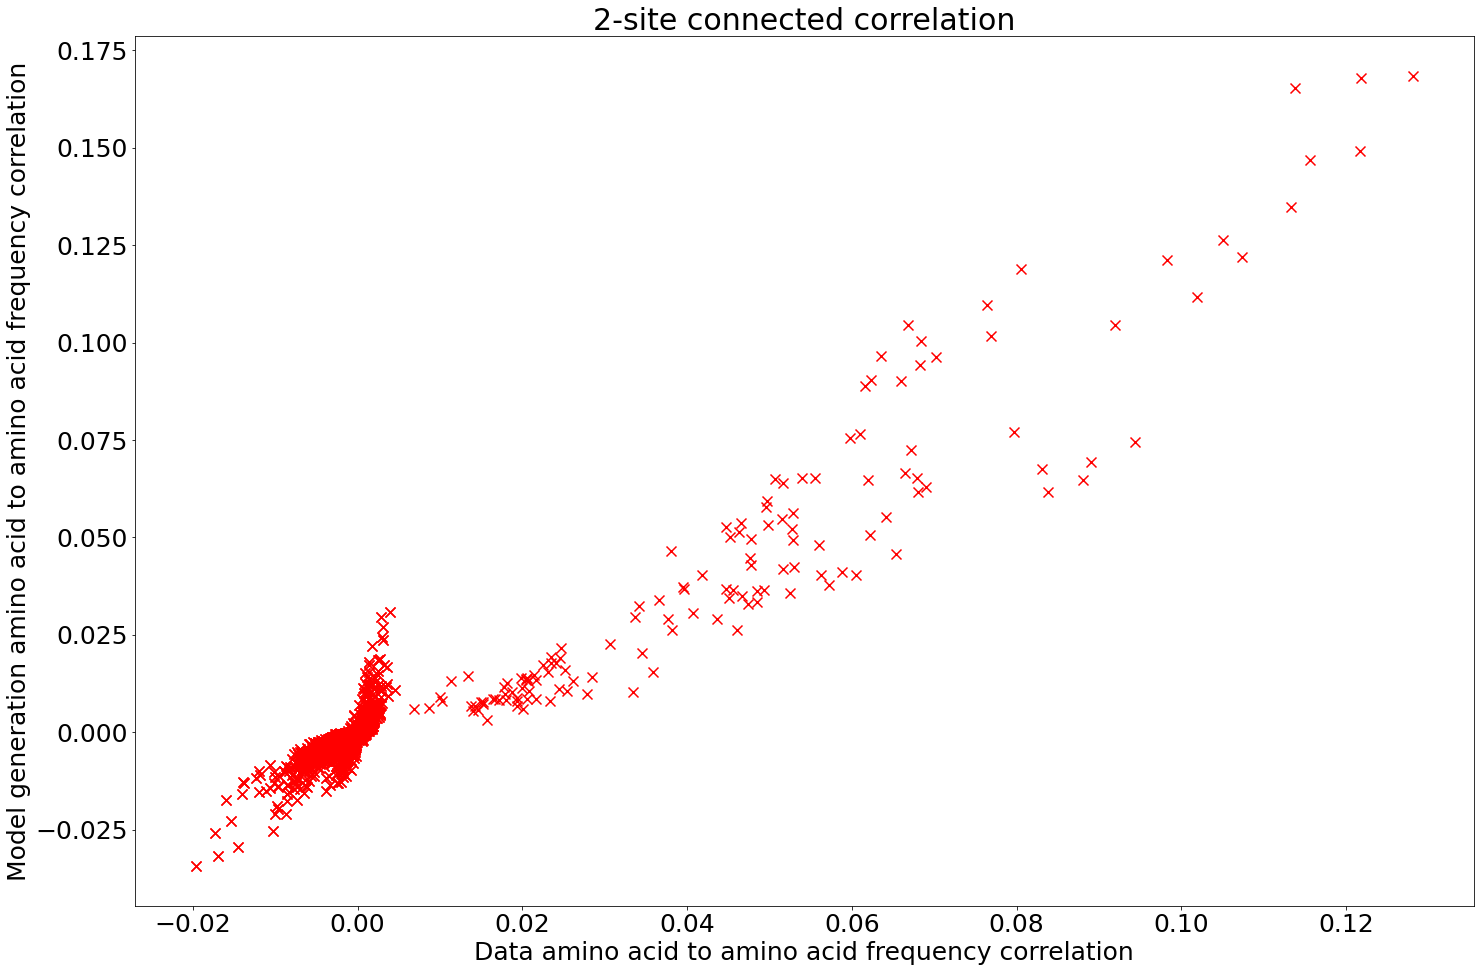

In [28]:
# 1. calculate amino acid to amino acid frequency in two positions for validation data

# create a 4D array to store number of amino acids in each position
# 1st dimension: position
# 2nd dimension: position
# 3rd dimension: amino acid
# 4th dimension: amino acid
amino_count_2_sites = np.zeros((len(validation_array[0][1]), len(validation_array[0][1]), len(amino_dict_freq), len(amino_dict_freq)))

# count amino acid to amino acid in each position pair
for i in range(len(validation_array)):
	for j in range(len(validation_array[i][1])):
		for k in range(len(validation_array[i][1])):
			amino_count_2_sites[j][k][amino_dict_freq[validation_array[i][1][j]]][amino_dict_freq[validation_array[i][1][k]]] += 1
            
# calculate amino acid to amino acid frequency in each position pair
amino_freq_2_sites = amino_count_2_sites / np.sum(amino_count_2_sites, axis=(2, 3))[:, :, None, None]

# calculate correlation given by amino_freq_2_sites - product of amino_freq at each position
amino_freq_2_sites_corr = amino_freq_2_sites - np.einsum('ij,kl->ikjl', amino_freq, amino_freq)

# 2. calculate amino acid to amino acid frequency in two positions for training data

# create a 4D array to store number of amino acids in each position
# 1st dimension: position
# 2nd dimension: position
# 3rd dimension: amino acid
# 4th dimension: amino acid
amino_count_2_sites_train = np.zeros((len(train_array[0][1]), len(train_array[0][1]), len(amino_dict_freq), len(amino_dict_freq)))

# count amino acid to amino acid in each position pair
for i in range(len(train_array)):
	for j in range(len(train_array[i][1])):
		for k in range(len(train_array[i][1])):
			amino_count_2_sites_train[j][k][amino_dict_freq[train_array[i][1][j]]][amino_dict_freq[train_array[i][1][k]]] += 1

# calculate amino acid to amino acid frequency in each position pair
amino_freq_2_sites_train = amino_count_2_sites_train / np.sum(amino_count_2_sites_train, axis=(2, 3))[:, :, None, None]

# calculate correlation given by amino_freq_2_sites_train - product of amino_freq at each position
amino_freq_2_sites_train_corr = amino_freq_2_sites_train - np.einsum('ij,kl->ikjl', amino_freq_train, amino_freq_train)

# 3. calculate amino acid to amino acid frequency in two positions for prediction

# create a 4D array to store number of amino acids in each position
# 1st dimension: position
# 2nd dimension: position
# 3rd dimension: amino acid
# 4th dimension: amino acid
amino_count_2_sites_pred = np.zeros((len(validation_array[0][1]), len(validation_array[0][1]), len(amino_dict_freq), len(amino_dict_freq)))

# count amino acid to amino acid in each position pair
for i in range(len(peptide_pred)):
	for j in range(len(peptide_pred[i][1])):
		for k in range(len(peptide_pred[i][1])):
			amino_count_2_sites_pred[j][k][amino_dict_freq[peptide_pred[i][1][j]]][amino_dict_freq[peptide_pred[i][1][k]]] += 1

# calculate amino acid to amino acid frequency in each position pair
amino_freq_2_sites_pred = amino_count_2_sites_pred / np.sum(amino_count_2_sites_pred, axis=(2, 3))[:, :, None, None]

# calculate correlation given by amino_freq_2_sites - product of amino_freq at each position
amino_freq_2_sites_pred_corr = amino_freq_2_sites_pred - np.einsum('ij,kl->ikjl', amino_freq_pred, amino_freq_pred)

# 4. scatter plot the validation data frequency vs model generation frequency on a single plot
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
for i in range(len(amino_freq_2_sites_corr)):
	for j in range(len(amino_freq_2_sites_corr[i])):
		plt.scatter(amino_freq_2_sites_corr[i][j], amino_freq_2_sites_pred_corr[i][j], c='r', s=100, marker = "x")
plt.xlabel('Validation data amino acid frequency')
plt.ylabel('Model generation amino acid to amino acid frequency correlation')
plt.title('2-site connected correlation of amino acids in validation data vs model generation')
plt.savefig('model_evaluation/2_site_corr_validation_vs_model_generation.png')
plt.show()

# 5. scatter plot the training data frequency vs model generation frequency on a single plot
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
for i in range(len(amino_freq_2_sites_train_corr)):
	for j in range(len(amino_freq_2_sites_train_corr[i])):
		plt.scatter(amino_freq_2_sites_train_corr[i][j], amino_freq_2_sites_pred_corr[i][j], c='r', s=100, marker = "x")
plt.xlabel('Training data amino acid frequency')
plt.ylabel('Model generation amino acid to amino acid frequency correlation')
plt.title('2-site connected correlation of amino acids in training data vs model generation')
plt.savefig('model_evaluation/2_site_corr_training_vs_model_generation.png')
plt.show()

# 6. scatter plot the training data frequency vs validation data frequency on a single plot
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
for i in range(len(amino_freq_2_sites_train_corr)):
	for j in range(len(amino_freq_2_sites_train_corr[i])):
		plt.scatter(amino_freq_2_sites_train_corr[i][j], amino_freq_2_sites_corr[i][j], c='r', s=100, marker = "x")
plt.xlabel('Training data amino acid frequency')
plt.ylabel('Validation data amino acid to amino acid frequency correlation')
plt.title('2-site connected correlation of amino acids in training data vs validation data')
plt.savefig('model_evaluation/2_site_corr_training_vs_validation.png')
plt.show()